# AsaPy

### Asa Prediction

#### Prediction.full_cycle

    """
    Performs the full cycle of the machine learning pipeline: loads or trains the models, preprocesses the input data,
    generates predictions, and post-processes the output data.

    Args:
        X_pred (pandas.DataFrame): Input data to generate predictions for.
        load (bool, optional): If True, loads the trained models from disk instead of training new ones. Default is False.
        **kwargs: Additional keyword arguments passed to either `load_model()` or `train_model()` method.

    Returns:
        pandas.DataFrame: Dataframe with the generated predictions.

    Raises:
        ValueError: If `load` is True and `path` is not provided in `kwargs`.
    """


In [1]:
import asapy
from sklearn.datasets import load_diabetes, load_wine
from sklearn.model_selection import train_test_split

## RandomForest

#### Classification

In [2]:
ml = asapy.AsaML()

In [3]:
# multi_cat classification
X, y  = load_wine(as_frame=True, return_X_y=True)
y = y.to_frame()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [5]:
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'RandomForest', search = True, remove_outlier=True)

Removed 0 rows.

Best hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 18, 'n_estimators': 356}


TypeError: RandomForest.fit() got an unexpected keyword argument 'validation_data'

In [ ]:
out = out.astype(int)
y_pred = y_pred.astype(int)

In [ ]:
diff = out.compare(y_pred)
len(diff)

1

#### Regression

In [ ]:
#dataset para regressão com duas colunas target
X, y  = load_diabetes(as_frame=True, return_X_y=True)
y = y.to_frame()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [ ]:
ml = asapy.AsaML()
ml.dir_name

'2023_03_29_(19-33-15)'

In [ ]:
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'RandomForest', search = True, remove_outlier=True)

Best hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 19, 'n_estimators': 228}


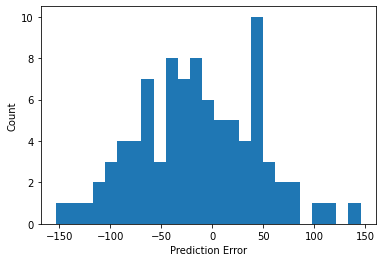

In [ ]:
from matplotlib import pyplot as plt
error = out - y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

### Neural Networks

#### Classification

In [ ]:
ml = asapy.AsaML()

In [ ]:
# multi-cat classification
X, y  = load_wine(as_frame=True, return_X_y=True)
y = y.to_frame()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [ ]:
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'NN', search = True, epochs = 500, patience = 10, remove_outlier=True)

Trial 30 Complete [00h 00m 04s]
val_accuracy: 0.37931033968925476

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 25s
INFO:tensorflow:Oracle triggered exit
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 192)               2688      
                                                                 
 dense_18 (Dense)            (None, 41)                7913      
                                                                 
 dense_19 (Dense)            (None, 157)               6594      
                                                                 
 dense_20 (Dense)            (None, 140)               22120     
                                                                 
 dense_21 (Dense)            (None, 225)               31725     
                                                                 
 dense_22 (Dense)  

In [ ]:
out = out.astype(int)
y_pred = y_pred.astype(int)
diff = out.compare(y_pred)
len(diff)

1

#### Regression

In [ ]:
# regression with two columns target
X, y  = load_diabetes(as_frame=True, return_X_y=True)
y = y.to_frame()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [ ]:
ml = asapy.AsaML()
ml.dir_name

'2023_03_29_(19-37-02)'

In [ ]:
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'NN', search = True, epochs = 500, patience = 10, remove_outlier=True)

Trial 30 Complete [00h 00m 11s]
val_loss: 5067.35791015625

Best val_loss So Far: 2022.774658203125
Total elapsed time: 00h 03m 28s
INFO:tensorflow:Oracle triggered exit
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 105)               1260      
                                                                 
 dense_21 (Dense)            (None, 183)               19398     
                                                                 
 dense_22 (Dense)            (None, 54)                9936      
                                                                 
 dense_23 (Dense)            (None, 217)               11935     
                                                                 
 dense_24 (Dense)            (None, 254)               55372     
                                                                 
 dense_25 (Dense

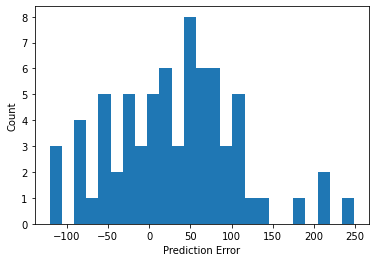

In [ ]:
from matplotlib import pyplot as plt
error = out - y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

#### Load model

In [ ]:
# regression with two columns target
X, y  = load_diabetes(as_frame=True, return_X_y=True)
y = y.to_frame()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [ ]:
ml = asapy.AsaML()

In [ ]:
out = ml.full_cycle(X_test,load = True,  path = 'models/2023_03_29_(19-37-02)')

3/3 [==============================] - 0s 2ms/step


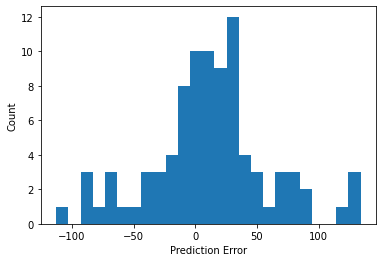

In [ ]:
from matplotlib import pyplot as plt
error = out - y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

#### Inserting the hyperparametes

In [6]:
# multi-cat classification
X, y  = load_wine(as_frame=True, return_X_y=True)
y = y.to_frame()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X = X_train
y = y_train
X_pred = X_test.reset_index(drop=True)
y_pred = y_test.reset_index(drop=True)

In [8]:
ml = asapy.AsaML()

In [9]:
params  = {'n_neurons' : [64,64], 'n_layers' :  2, 'epochs' : 500, 'patience' : 10}
out = ml.full_cycle(X_test, X = X, y = y, name_model = 'NN',search = False, params = params, remove_outlier=True)

Removed 0 rows.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
3/3 [==============================] - 2s 181ms/step - loss: 3.6572 - accuracy: 0.3444 - val_loss: 3.9198 - val_accuracy: 0.3478
Epoch 2/500
3/3 [==============================] - 0s 52ms/step - loss: 3.3732 - accuracy: 0.4444 - val_loss: 3.8967 - val_accuracy: 0.3478
Epoch 3/500
3/3 [===

In [10]:
out = out.astype(int)
y_pred = y_pred.astype(int)
diff = out.compare(y_pred)
len(diff)

2